In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, \
    precision_score, \
    recall_score, \
    ConfusionMatrixDisplay, \
    f1_score, \
    classification_report
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("Challenger_Ranked_Games.csv", sep=",")
print(df.isnull().any().any())

False


In [3]:
df.replace([np.inf, -np.inf], 0, inplace=True)

In [4]:
print(df.head())

       gameId  gameDuraton  blueWins  blueFirstBlood  blueFirstTower  \
0  4247263043         1323         0               1               0   
1  4247155821         1317         1               0               0   
2  4243963257          932         0               0               0   
3  4241678498         2098         0               0               0   
4  4241538868         2344         1               1               1   

   blueFirstBaron  blueFirstDragon  blueFirstInhibitor  blueDragonKills  \
0               0                0                   0                0   
1               0                1                   0                2   
2               0                0                   0                0   
3               1                1                   0                1   
4               1                1                   1                2   

   blueBaronKills  ...  redAssist  redChampionDamageDealt  redTotalGold  \
0               0  ...         68        

In [5]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm',
                               vmin=-1,
                               vmax=1)

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
gameId,1.000000,-0.025468,-0.005385,-0.010942,0.004411,-0.023029,-0.015300,-0.006665,-0.013351,-0.022253,-0.019476,0.000894,-0.083464,-0.052451,-0.015259,-0.014959,0.027355,0.009712,-0.027175,-0.062907,0.005506,0.005506,-0.035970,-0.004878,0.007881,-0.026895,0.005385,0.010233,-0.006565,-0.034905,-0.022539,-0.001674,-0.022303,-0.038990,-0.020629,-0.002763,-0.081666,-0.061250,-0.014943,-0.015083,0.031041,0.011027,-0.026877,-0.058942,0.007164,0.007164,-0.038405,-0.008652,0.012081,-0.036889
gameDuraton,-0.025468,1.000000,-0.001414,-0.002982,0.055433,0.395313,0.079317,0.207592,0.480537,0.501499,0.431296,0.293628,0.840685,0.804957,0.366724,0.374059,0.337086,0.684659,0.776835,0.900700,0.755377,0.755377,0.799519,0.326444,0.705497,0.640389,0.001414,0.014910,0.011624,0.417492,0.126008,0.201119,0.513461,0.528711,0.429695,0.294642,0.840759,0.806386,0.374961,0.365549,0.342904,0.686816,0.777556,0.903212,0.759482,0.759482,0.796047,0.335574,0.706917,0.635481
blueWins,-0.005385,-0.001414,1.000000,0.206442,0.449065,0.366722,0.267778,0.637521,0.466442,0.355048,0.708405,0.554367,0.037542,0.070485,0.453521,-0.439782,0.372974,0.180180,0.276481,0.078853,0.226127,0.226127,0.207726,0.420451,0.215695,0.525094,-1.000000,-0.207341,-0.446742,-0.394066,-0.267998,-0.622811,-0.467407,-0.381037,-0.709306,-0.547457,-0.050044,-0.087605,-0.441799,0.451537,-0.356230,-0.173693,-0.270733,-0.083117,-0.215335,-0.215335,-0.231264,-0.411601,-0.222140,-0.548136
blueFirstBlood,-0.010942,-0.002982,0.206442,1.000000,0.209255,0.057685,0.133711,0.146766,0.135553,0.047449,0.182879,0.120126,0.007325,0.013368,0.131871,-0.152955,0.082355,0.033446,0.068347,0.029703,0.045685,0.045685,0.056812,0.123159,0.021933,0.138878,-0.206442,-0.995993,-0.206566,-0.061839,-0.127026,-0.140193,-0.137315,-0.053675,-0.180775,-0.115754,-0.015520,-0.024865,-0.153660,0.131082,-0.102884,-0.061781,-0.090844,-0.030316,-0.057688,-0.057688,-0.056519,-0.143134,-0.043987,-0.147183
blueFirstTower,0.004411,0.055433,0.449065,0.209255,1.000000,0.134875,0.195663,0.344918,0.286556,0.112454,0.466119,0.287067,0.066665,0.092676,0.274319,-0.232112,0.181827,0.125737,0.205284,0.115147,0.165176,0.165176,0.189967,0.265503,0.110765,0.371794,-0.449065,-0.205037,-0.976836,-0.115343,-0.166657,-0.319866,-0.234265,-0.087375,-0.414710,-0.266283,0.023182,-0.010243,-0.233292,0.272922,-0.140172,-0.067617,-0.120010,-0.006552,-0.053443,-0.053443,-0.110690,-0.227322,-0.047059,-0.309297
blueFirstBaron,-0.023029,0.395313,0.366722,0.057685,0.134875,1.000000,0.116563,0.424044,0.403234,0.880056,0.529667,0.407331,0.399604,0.387845,0.299192,-0.047177,0.242308,0.313691,0.428876,0.387380,0.397201,0.397201,0.470242,0.263772,0.376371,0.633739,-0.366722,-0.055406,-0.121773,-0.342623,-0.012061,-0.225692,0.050167,-0.218780,-0.124365,-0.175491,0.359896,0.311173,-0.047412,0.298074,-0.053746,0.172979,0.180171,0.373894,0.187407,0.187407,0.248108,-0.048145,0.164696,-0.005932
blueFirstDragon,-0.015300,0.079317,0.267778,0.133711,0.195663,0.116563,1.000000,0.163540,0.583926,0.108725,0.267873,0.115988,0.156538,0.120762,0.081948,-0.218187,-0.023811,0.006938,0.077442,0.168549,0.042150,0.042150,0.243731,0.061190,0.085937,0.328543,-0.267778,-0.130395,-0.177497,-0.040840,-0.833177,-0.178384,-0.392175,-0.029286,-0.170506,-0.15158

In [6]:
columns = list(df.drop(["blueWins", "gameId", "redWins"], axis=1).columns)
to_normalize = []
for elem in columns:
    if elem.find("First") == -1:
        to_normalize.append(elem)

In [7]:
print(to_normalize)

def normalizer(df, to_normalize):
    df_scaled = df.copy()
    for feature in to_normalize:
        df_scaled[feature] = (df_scaled[feature] - df_scaled[feature].min()) / (df_scaled[feature].max() - df_scaled[feature].min())
    return df_scaled


df = normalizer(df, to_normalize)
print(df.head())

['gameDuraton', 'blueDragonKills', 'blueBaronKills', 'blueTowerKills', 'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills', 'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold', 'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel', 'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal', 'blueObjectDamageDealt', 'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills', 'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist', 'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills', 'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills', 'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt']
       gameId  gameDuraton  blueWins  blueFirstBlood  blueFirstTower  \
0  4247263043     0.364192         0               1               0   
1  4247155821     0.362263         1               0               0   
2  4243963257     0.238509         0               0               0   
3  4241678498     0.613308      

In [8]:
X = df.drop(["blueWins", "gameId", "redWins"], axis=1)

In [9]:
y = df["blueWins"]
print(len(y.unique()))

2


(array([13450.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 13454.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

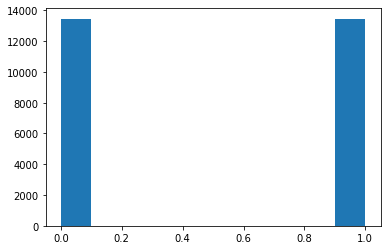

In [10]:
plt.hist(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=42,
                                                    shuffle=True)

In [12]:
mlpc = MLPClassifier(alpha=0.01)
catboost = CatBoostClassifier(silent=True)
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()

In [13]:
mlpc.fit(X_train, y_train)
catboost.fit(X_train, y_train)
knn.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Multylayer Perceptron
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5332
           1       0.98      1.00      0.99      5430

    accuracy                           0.99     10762
   macro avg       0.99      0.99      0.99     10762
weighted avg       0.99      0.99      0.99     10762



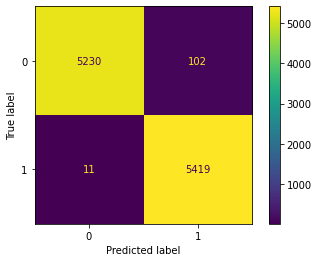

Catboost
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5332
           1       0.99      0.99      0.99      5430

    accuracy                           0.99     10762
   macro avg       0.99      0.99      0.99     10762
weighted avg       0.99      0.99      0.99     10762



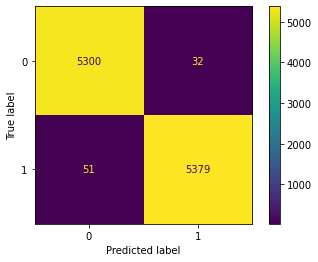

KNN
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5332
           1       0.98      0.97      0.97      5430

    accuracy                           0.97     10762
   macro avg       0.97      0.97      0.97     10762
weighted avg       0.97      0.97      0.97     10762



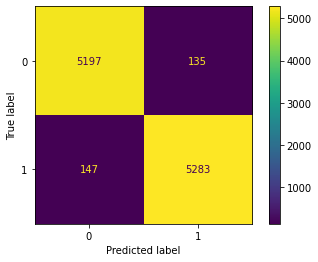

Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5332
           1       0.98      0.97      0.98      5430

    accuracy                           0.98     10762
   macro avg       0.98      0.98      0.98     10762
weighted avg       0.98      0.98      0.98     10762



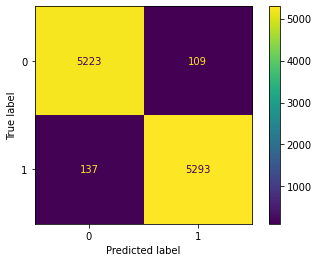

In [14]:
y_pred_mlpc = mlpc.predict(X_test)
y_pred_catboost = catboost.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)

y_pred_models = [y_pred_mlpc, y_pred_catboost, y_pred_knn, y_pred_decision_tree]
models = ["Multylayer Perceptron", "Catboost", "KNN", "Decision Tree"]

i = 0
for my_model_pred in y_pred_models:
    print(models[i])
    print(classification_report(y_true=y_test, y_pred=my_model_pred))
    ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=my_model_pred)
    plt.show()
    i += 1

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

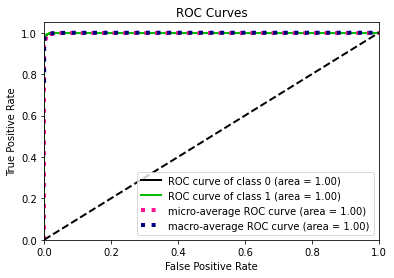

In [15]:
import scikitplot as skplt
y_probas = mlpc.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)

In [16]:
from sklearn.model_selection import StratifiedKFold
from statistics import mean

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lst_accu_stratified = []

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    mlpc.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(mlpc.score(x_test_fold, y_test_fold))

print('List of possible Accu: ', lst_accu_stratified)
print('\nMean accu is: ', mean(lst_accu_stratified))

List of possible Accu:  [0.9916372421482996, 0.9901505296413307, 0.992380598401784, 0.9908938858948151, 0.9927509293680298]

Mean accu is:  0.9915626370908518
